### Random Sample Imputation

Aim:Random Sample imputation consist of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?
It assumes that the data are missing completely at random(MCAR)


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [12]:
df['Age'].isnull().sum()

177

In [14]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [15]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [16]:
median=df.Age.median()

In [17]:
median

28.0

In [18]:
impute_nan(df,'Age',median)

In [19]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [20]:
import matplotlib.pyplot as plt

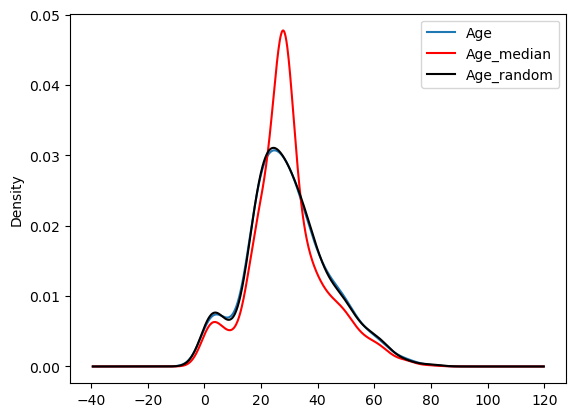

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde',ax=ax,color='black')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages
1.Easy to implement

2.There is less distortion in variance

#### Disadvantage
1.In Every situation randomness won't work

#### Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [26]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df['Age_NAN']=np.where(df.Age.isnull(),1,0)

In [29]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [31]:
df.Age.median()

28.0

In [32]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [35]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement.

2. Captures the importance of missing values.
#### Disadvantage
1. Creating Additional Features(Curse of Dimensionality)

#### End of Distribution Imputation

In [36]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

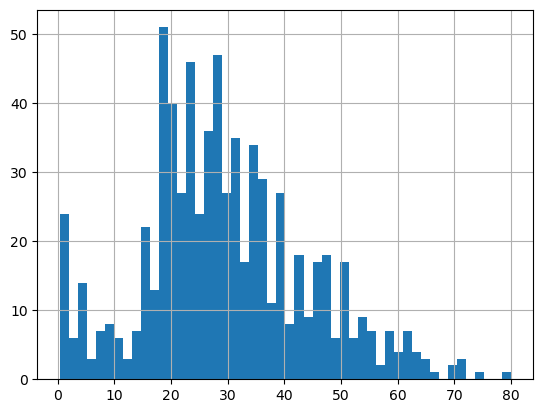

In [38]:
df.Age.hist(bins=50)

In [39]:
df.Age.mean()+3*df.Age.std()

73.27860964406095

In [40]:
import seaborn as sns
sns.boxplot('Age',data=df)

TypeError: boxplot() got multiple values for argument 'data'

In [41]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [42]:
impute_nan(df,'Age',df.Age.median(),df.Age.mean()+3*df.Age.std())

In [45]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

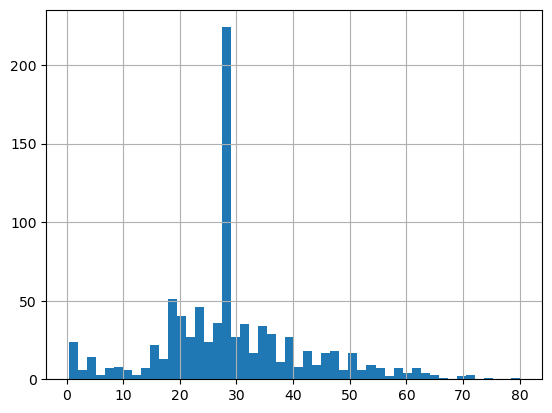

In [46]:
df['Age'].hist(bins=50)

<Axes: >

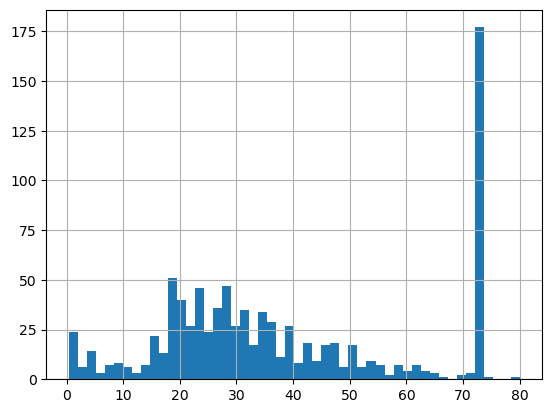

In [47]:
df['Age_end_distribution'].hist(bins=50)

In [50]:
sns.boxplot('Age_end_distribution',data=df)

TypeError: boxplot() got multiple values for argument 'data'

### Advantages
1.Easy to implement

2.Captures the importance of missingness if there is one

#### Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and preprocessed in as subsequent
   feature engineering